# Importing Dependencies

In [2]:
#!pip install mlxtend#

  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scikit_learn-1.1.1-cp38-cp38-win_amd64.whl (7.3 MB)

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

scikit-learn 1.1.1 requires joblib>=1.0.0, but you'll have joblib 0.17.0 which is incompatible.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Loading Data

In [3]:
data = pd.read_csv("grocery_dataset.txt", header=None, delimiter = "/t", engine="python")

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
data

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [4]:
#data.index.name = "T_ID"
#data.columns.name = "ITEM"
data = data.rename_axis(index="T_ID")
data.columns = ["ITEMS"]
data

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ITEMS
T_ID,
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."


In [5]:
data = data["ITEMS"].str.split(",", expand=True)
data

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
T_ID,,,,,,,,,,,,,,,,,,,,,
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,None,None,None,None,None,None,None,None,None,None
9831,cooking chocolate,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,None,None,None,None,None,None,None,None,None,None


In [8]:
data.isnull().sum()

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        0
1     2159
2     3802
3     5101
4     6106
5     6961
6     7606
7     8151
8     8589
9     8939
10    9185
11    9367
12    9484
13    9562
14    9639
15    9694
16    9740
17    9769
18    9783
19    9797
20    9806
21    9817
22    9821
23    9827
24    9828
25    9828
26    9829
27    9830
28    9831
29    9834
30    9834
31    9834
dtype: int64

In [6]:
grocery_items = set()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)

output_list = list()
with open("grocery_dataset.txt") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery = pd.DataFrame(output_list)

grocery.head()

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,butter milk,dish cleaner,coffee,frozen fish,snack products,instant coffee,hamburger meat,root vegetables,other vegetables,syrup,...,canned vegetables,sauces,rubbing alcohol,make up remover,newspapers,bags,dog food,pip fruit,brandy,pickled vegetables
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
grocery.columns.tolist()

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['female sanitary products',
 'flower soil/fertilizer',
 'shopping bags',
 'toilet cleaner',
 'dessert',
 'red/blush wine',
 'bags',
 'pip fruit',
 'snack products',
 'abrasive cleaner',
 'bottled water',
 'prosecco',
 'rubbing alcohol',
 'beverages',
 'processed cheese',
 'whole milk',
 'mayonnaise',
 'syrup',
 'specialty cheese',
 'baking powder',
 'salad dressing',
 'pickled vegetables',
 'baby food',
 'dog food',
 'honey',
 'misc. beverages',
 'berries',
 'margarine',
 'specialty bar',
 'make up remover',
 'tropical fruit',
 'citrus fruit',
 'condensed milk',
 'frozen fish',
 'pot plants',
 'liqueur',
 'popcorn',
 'oil',
 'rolls/buns',
 'organic sausage',
 'napkins',
 'pet care',
 'chocolate',
 'canned beer',
 'instant coffee',
 'cat food',
 'Instant food products',
 'ice cream',
 'cookware',
 'mustard',
 'nuts/prunes',
 'nut snack',
 'newspapers',
 'white bread',
 'seasonal products',
 'sliced cheese',
 'potato products',
 'decalcifier',
 'butter milk',
 'yogurt',
 'candles',
 'ch

# View Top Sold items

In [11]:
total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  43367

Item Summary:
          item_name  item_count
0        whole milk        2513
1  other vegetables        1903
2        rolls/buns        1809
3              soda        1715
4            yogurt        1372


C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Visualize Top Sold Items

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


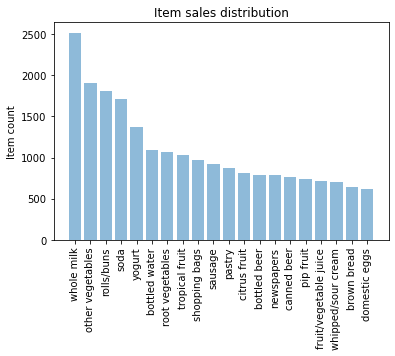

In [12]:
objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()

# Generating frequent itemsets

In [7]:
frequent_itemsets = apriori(grocery, min_support=0.02, use_colnames=True)
frequent_itemsets

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.027961,(butter milk)
1,0.058058,(coffee)
2,0.033249,(hamburger meat)
3,0.108998,(root vegetables)
4,0.193493,(other vegetables)
...,...,...
117,0.030605,"(rolls/buns, sausage)"
118,0.024606,"(rolls/buns, tropical fruit)"
119,0.020437,"(pip fruit, tropical fruit)"
120,0.023183,"(whole milk, root vegetables, other vegetables)"


# Generating rules

In [8]:
my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
my_rules.head(100)

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
1,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
2,(yogurt),(root vegetables),0.139502,0.108998,0.025826,0.185131,1.698475,0.010621,1.093429
3,(root vegetables),(yogurt),0.108998,0.139502,0.025826,0.236940,1.698475,0.010621,1.127694
4,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
...,...,...,...,...,...,...,...,...,...
95,(soda),(rolls/buns),0.174377,0.183935,0.038332,0.219825,1.195124,0.006258,1.046003
96,(bottled water),(soda),0.110524,0.174377,0.028978,0.262190,1.503577,0.009705,1.119017
97,(soda),(bottled water),0.174377,0.110524,0.028978,0.166181,1.503577,0.009705,1.066750
98,(soda),(sausage),0.174377,0.093950,0.024301,0.139359,1.483324,0.007918,1.052761


In [15]:
#viewing top 100 rules
my_rules.head(100)

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(shopping bags),(soda),0.098526,0.174377,0.024606,0.249742,1.432194,0.007425,1.100452
1,(soda),(shopping bags),0.174377,0.098526,0.024606,0.141108,1.432194,0.007425,1.049578
2,(shopping bags),(other vegetables),0.098526,0.193493,0.023183,0.235294,1.216037,0.004119,1.054663
3,(other vegetables),(shopping bags),0.193493,0.098526,0.023183,0.119811,1.216037,0.004119,1.024182
4,(pip fruit),(whole milk),0.075648,0.255516,0.030097,0.397849,1.557043,0.010767,1.236375
...,...,...,...,...,...,...,...,...,...
95,(pastry),(soda),0.088968,0.174377,0.021047,0.236571,1.356665,0.005533,1.081467
96,(sausage),(soda),0.093950,0.174377,0.024301,0.258658,1.483324,0.007918,1.113687
97,(soda),(sausage),0.174377,0.093950,0.024301,0.139359,1.483324,0.007918,1.052761
98,(other vegetables),(pastry),0.193493,0.088968,0.022572,0.116658,1.311235,0.005358,1.031347


In [18]:
a = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
a

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.52834


In [65]:
with open("rules.txt", 'w') as file:
    for line in my_rules:
        file.write(line)

In [16]:
my_rules

C:\Users\SAMUEL NWABUIKE\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(shopping bags),(soda),0.098526,0.174377,0.024606,0.249742,1.432194,0.007425,1.100452
1,(soda),(shopping bags),0.174377,0.098526,0.024606,0.141108,1.432194,0.007425,1.049578
2,(shopping bags),(other vegetables),0.098526,0.193493,0.023183,0.235294,1.216037,0.004119,1.054663
3,(other vegetables),(shopping bags),0.193493,0.098526,0.023183,0.119811,1.216037,0.004119,1.024182
4,(pip fruit),(whole milk),0.075648,0.255516,0.030097,0.397849,1.557043,0.010767,1.236375
...,...,...,...,...,...,...,...,...,...
121,"(other vegetables, root vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
122,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
123,(other vegetables),"(root vegetables, whole milk)",0.193493,0.048907,0.023183,0.119811,2.449770,0.013719,1.080555
124,(whole milk),"(other vegetables, root vegetables)",0.255516,0.047382,0.023183,0.090728,1.914833,0.011076,1.047672


In [30]:
my_rules.to_csv("rules.csv", index=False)

In [31]:
result = list(my_rules)

In [32]:
result

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']